In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
pd.set_option('display.max_rows',None)

# Importing my dataset

In [5]:
df= pd.read_csv(r'/home/blunder-master/Downloads/archive/covid_19_data.csv')

In [6]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0       1.00    0.00       0.00  
1      14.00    0.00       0.00  
2       6.00    0.00       0.00  
3       1.00    0.00       0.00  
4       0.00    0.00       0.00

In [7]:
df.shape

(306429, 8)

In [8]:
df.tail()

SNo ObservationDate     Province/State  Country/Region  \
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306424  2021-05-30 04:20:55  102641.00 2335.00   95289.00  
306425  2021-05-30 04:20:55   29147.00  245.00       0.00  
306426  2021-05-30 04:20:55    1364.00    1.00    1324.00  
306427  2021-05-30 04:20:55   87550.00 1738.00   83790.00  
306428  2021-05-30 04:20:55  391559.00 4252.00       0.00

# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [10]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
df.describe()

SNo  Confirmed    Deaths  Recovered
count 306429.00  306429.00 306429.00  306429.00
mean  153215.00   85670.91   2036.40   50420.29
std    88458.58  277551.60   6410.94  201512.45
min        1.00 -302844.00   -178.00 -854405.00
25%    76608.00    1042.00     13.00      11.00
50%   153215.00   10375.00    192.00    1751.00
75%   229822.00   50752.00   1322.00   20270.00
max   306429.00 5863138.00 112385.00 6399531.00

In [12]:
Confirmed=df.groupby('ObservationDate').sum()['Confirmed'].reset_index()

In [13]:
Confirmed

ObservationDate    Confirmed
0        01/01/2021  84092619.00
1        01/02/2021  84718978.00
2        01/03/2021  85251774.00
3        01/04/2021  85805892.00
4        01/05/2021  86546014.00
5        01/06/2021  87329386.00
6        01/07/2021  88210223.00
7        01/08/2021  89013445.00
8        01/09/2021  89774439.00
9        01/10/2021  90363573.00
10       01/11/2021  90983503.00
11       01/12/2021  91689011.00
12       01/13/2021  92437399.00
13       01/14/2021  93192627.00
14       01/15/2021  93959814.00
15       01/16/2021  94598958.00
16       01/17/2021  95128170.00
17       01/18/2021  95643236.00
18       01/19/2021  96251662.00
19       01/20/2021  96944599.00
20       01/21/2021  97600922.00
21       01/22/2020       557.00
22       01/22/2021  98259983.00
23       01/23/2020      1097.00
24       01/23/2021  98828107.00
25       01/24/2020       941.00
26       01/24/2021  99273761.00
27       01/25/2020      1437.00
28       01/25/2021  99771101.00
29       01/26/2020      2118.00
30       01/26/2021 100327339.00
31       01/27/2020      2927.00
32       01/27/2021 100925700.00
33       01/28/2020      5578.00
34       01/28/2021 101539951.00
35       01/29/2020      6165.00
36       01/29/2021 102130394.00
37       01/30/2020      8235.00
38       01/30/2021 102645724.00
39       01/31/2020      9925.00
40       01/31/2021 103027363.00
41       02/01/2020     12038.00
42       02/01/2021 103474137.00
43       02/02/2020     16787.00
44       02/02/2021 103932094.00
45       02/03/2020     19881.00
46       02/03/2021 104454075.00
47       02/04/2020     23892.00
48       02/04/2021 104920982.00
49       02/05/2020     27636.00
50       02/05/2021 105456410.00
51       02/06/2020     30818.00
52       02/06/2021 105828535.00
53       02/07/2020     34392.00
54       02/07/2021 106226613.00
55       02/08/2020     37121.00
56       02/08/2021 106542506.00
57       02/09/2020     40151.00
58       02/09/2021 106970539.00
59       02/10/2020     42763.00
60       02/10/2021 107406280.00
61       02/11/2020     44803.00
62       02/11/2021 107847745.00
63       02/12/2020     45222.00
64       02/12/2021 108276434.00
65       02/13/2020     60370.00
66       02/13/2021 108649735.00
67       02/14/2020     66887.00
68       02/14/2021 108943585.00
69       02/15/2020     69033.00
70       02/15/2021 109226751.00
71       02/16/2020     71226.00
72       02/16/2021 109577771.00
73       02/17/2020     73260.00
74       02/17/2021 109973326.00
75       02/18/2020     75138.00
76       02/18/2021 110376842.00
77       02/19/2020     75641.00
78       02/19/2021 110789361.00
79       02/20/2020     76199.00
80       02/20/2021 111159816.00
81       02/21/2020     76843.00
82       02/21/2021 111474262.00
83       02/22/2020     78599.00
84       02/22/2021 111762700.00
85       02/23/2020     78985.00
86       02/23/2021 112151553.00
87       02/24/2020     79570.00
88       02/24/2021 112596489.00
89       02/25/2020     80415.00
90       02/25/2021 113043967.00
91       02/26/2020     81397.00
92       02/26/2021 113487006.00
93       02/27/2020     82756.00
94       02/27/2021 113876236.00
95       02/28/2020     84125.00
96       02/28/2021 114179745.00
97       02/29/2020     86012.00
98       03/01/2020     88368.00
99       03/01/2021 114485609.00
100      03/02/2020     90311.00
101      03/02/2021 114795897.00
102      03/03/2020     92856.00
103      03/03/2021 115237039.00
104      03/04/2020     95127.00
105      03/04/2021 115690088.00
106      03/05/2020     97936.00
107      03/05/2021 116137142.00
108      03/06/2020    101763.00
109      03/06/2021 116547675.00
110      03/07/2020    105832.00
111      03/07/2021 116915987.00
112      03/08/2020    109820.00
113      03/08/2021 117214710.00
114      03/09/2020    113776.00
115      03/09/2021 117629375.00
116      03/10/2020    118587.00
117      03/10/2021 118096454.00
118      03/11/2020    125850.00
119      03/11/2021 118573350.00
120      03

In [14]:
Deaths=df.groupby('ObservationDate').sum()['Deaths'].reset_index()

In [15]:
Deaths

ObservationDate     Deaths
0        01/01/2021 1834675.00
1        01/02/2021 1843108.00
2        01/03/2021 1850449.00
3        01/04/2021 1860598.00
4        01/05/2021 1875953.00
5        01/06/2021 1891006.00
6        01/07/2021 1905926.00
7        01/08/2021 1921092.00
8        01/09/2021 1933877.00
9        01/10/2021 1942225.00
10       01/11/2021 1952549.00
11       01/12/2021 1969887.00
12       01/13/2021 1986359.00
13       01/14/2021 2001730.00
14       01/15/2021 2016841.00
15       01/16/2021 2030089.00
16       01/17/2021 2038753.00
17       01/18/2021 2048179.00
18       01/19/2021 2065030.00
19       01/20/2021 2082668.00
20       01/21/2021 2099457.00
21       01/22/2020      17.00
22       01/22/2021 2115478.00
23       01/23/2020      34.00
24       01/23/2021 2128772.00
25       01/24/2020      26.00
26       01/24/2021 2137740.00
27       01/25/2020      42.00
28       01/25/2021 2148508.00
29       01/26/2020      56.00
30       01/26/2021 2165816.00
31       01/27/2020      82.00
32       01/27/2021 2182496.00
33       01/28/2020     131.00
34       01/28/2021 2199547.00
35       01/29/2020     133.00
36       01/29/2021 2214494.00
37       01/30/2020     171.00
38       01/30/2021 2228080.00
39       01/31/2020     213.00
40       01/31/2021 2236070.00
41       02/01/2020     259.00
42       02/01/2021 2246288.00
43       02/02/2020     362.00
44       02/02/2021 2261124.00
45       02/03/2020     426.00
46       02/03/2021 2276852.00
47       02/04/2020     492.00
48       02/04/2021 2289386.00
49       02/05/2020     564.00
50       02/05/2021 2305957.00
51       02/06/2020     634.00
52       02/06/2021 2316094.00
53       02/07/2020     719.00
54       02/07/2021 2324080.00
55       02/08/2020     806.00
56       02/08/2021 2332412.00
57       02/09/2020     906.00
58       02/09/2021 2347949.00
59       02/10/2020    1013.00
60       02/10/2021 2361352.00
61       02/11/2020    1113.00
62       02/11/2021 2374826.00
63       02/12/2020    1118.00
64       02/12/2021 2387299.00
65       02/13/2020    1371.00
66       02/13/2021 2397104.00
67       02/14/2020    1523.00
68       02/14/2021 2403466.00
69       02/15/2020    1666.00
70       02/15/2021 2410360.00
71       02/16/2020    1770.00
72       02/16/2021 2421278.00
73       02/17/2020    1868.00
74       02/17/2021 2432617.00
75       02/18/2020    2007.00
76       02/18/2021 2443987.00
77       02/19/2020    2122.00
78       02/19/2021 2455035.00
79       02/20/2020    2247.00
80       02/20/2021 2463547.00
81       02/21/2020    2251.00
82       02/21/2021 2469427.00
83       02/22/2020    2458.00
84       02/22/2021 2476376.00
85       02/23/2020    2469.00
86       02/23/2021 2487556.00
87       02/24/2020    2629.00
88       02/24/2021 2499559.00
89       02/25/2020    2708.00
90       02/25/2021 2509724.00
91       02/26/2020    2770.00
92       02/26/2021 2519974.00
93       02/27/2020    2814.00
94       02/27/2021 2528114.00
95       02/28/2020    2872.00
96       02/28/2021 2533548.00
97       02/29/2020    2941.00
98       03/01/2020    2996.00
99       03/01/2021 2540757.00
100      03/02/2020    3085.00
101      03/02/2021 2551191.00
102      03/03/2020    3160.00
103      03/03/2021 2562264.00
104      03/04/2020    3254.00
105      03/04/2021 2572042.00
106      03/05/2020    3349.00
107      03/05/2021 2582059.00
108      03/06/2020    3460.00
109      03/06/2021 2589891.00
110      03/07/2020    3563.00
111      03/07/2021 2595165.00
112      03/08/2020    3803.00
113      03/08/2021 2602025.00
114      03/09/2020    4002.00
115      03/09/2021 2612006.00
116      03/10/2020    4262.00
117      03/10/2021 2621697.00
118      03/11/2020    4615.00
119      03/11/2021 2631464.00
120      03/12/2020    4720.00
121      03/12/2021 2641092.00
122      03/13/2020    5404.00
123      03/13/2021 2649078.00
124      03/14/2020    5819.00
125      03/14/2021 2654577.00
126      03/15/2020    6440.00
127      03/15/2021 2661398.00
128  

In [16]:
Recovered=df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [17]:
Recovered

ObservationDate    Recovered
0        01/01/2021  47313005.00
1        01/02/2021  47614297.00
2        01/03/2021  47882779.00
3        01/04/2021  48173187.00
4        01/05/2021  48488548.00
5        01/06/2021  48801673.00
6        01/07/2021  49125604.00
7        01/08/2021  49422867.00
8        01/09/2021  49753112.00
9        01/10/2021  50023662.00
10       01/11/2021  50313950.00
11       01/12/2021  50657507.00
12       01/13/2021  51023568.00
13       01/14/2021  51396413.00
14       01/15/2021  51717035.00
15       01/16/2021  52034090.00
16       01/17/2021  52349805.00
17       01/18/2021  52668558.00
18       01/19/2021  53071502.00
19       01/20/2021  53399273.00
20       01/21/2021  53765412.00
21       01/22/2020        30.00
22       01/22/2021  54147169.00
23       01/23/2020        60.00
24       01/23/2021  54463662.00
25       01/24/2020        39.00
26       01/24/2021  54774619.00
27       01/25/2020        42.00
28       01/25/2021  55089060.00
29       01/26/2020        56.00
30       01/26/2021  55418603.00
31       01/27/2020        65.00
32       01/27/2021  55759372.00
33       01/28/2020       108.00
34       01/28/2021  56075031.00
35       01/29/2020       127.00
36       01/29/2021  56439138.00
37       01/30/2020       145.00
38       01/30/2021  56790304.00
39       01/31/2020       225.00
40       01/31/2021  57079203.00
41       02/01/2020       287.00
42       02/01/2021  57351845.00
43       02/02/2020       476.00
44       02/02/2021  57702035.00
45       02/03/2020       627.00
46       02/03/2021  58031882.00
47       02/04/2020       857.00
48       02/04/2021  58325871.00
49       02/05/2020      1129.00
50       02/05/2021  58607158.00
51       02/06/2020      1492.00
52       02/06/2021  58901715.00
53       02/07/2020      2016.00
54       02/07/2021  59179150.00
55       02/08/2020      2616.00
56       02/08/2021  59411984.00
57       02/09/2020      3245.00
58       02/09/2021  59783592.00
59       02/10/2020      3947.00
60       02/10/2021  60052900.00
61       02/11/2020      4684.00
62       02/11/2021  60328985.00
63       02/12/2020      5151.00
64       02/12/2021  60616584.00
65       02/13/2020      6294.00
66       02/13/2021  60862827.00
67       02/14/2020      8057.00
68       02/14/2021  61058258.00
69       02/15/2020      9396.00
70       02/15/2021  61346871.00
71       02/16/2020     10866.00
72       02/16/2021  61582276.00
73       02/17/2020     12583.00
74       02/17/2021  61876217.00
75       02/18/2020     14352.00
76       02/18/2021  62112835.00
77       02/19/2020     16121.00
78       02/19/2021  62347471.00
79       02/20/2020     18179.00
80       02/20/2021  62616687.00
81       02/21/2020     18892.00
82       02/21/2021  62833944.00
83       02/22/2020     22889.00
84       02/22/2021  63016514.00
85       02/23/2020     23394.00
86       02/23/2021  63295144.00
87       02/24/2020     25227.00
88       02/24/2021  63504603.00
89       02/25/2020     27905.00
90       02/25/2021  63732295.00
91       02/26/2020     30386.00
92       02/26/2021  63992563.00
93       02/27/2020     33278.00
94       02/27/2021  64243285.00
95       02/28/2020     36710.00
96       02/28/2021  64418462.00
97       02/29/2020     39781.00
98       03/01/2020     42717.00
99       03/01/2021  64633388.00
100      03/02/2020     45601.00
101      03/02/2021  64903492.00
102      03/03/2020     48228.00
103      03/03/2021  65132900.00
104      03/04/2020     51170.00
105      03/04/2021  65383180.00
106      03/05/2020     53796.00
107      03/05/2021  65609540.00
108      03/06/2020     55864.00
109      03/06/2021  65846043.00
110      03/07/2020     58357.00
111      03/07/2021  66084363.00
112      03/08/2020     60695.00
113      03/08/2021  66358921.00
114      03/09/2020     62512.00
115      03/09/2021  66621154.00
116      03/10/2020     64400.00
117      03/10/2021  66856510.00
118      03/11/2020     66999.00
119      03/11/2021  67129127.00
120      03

# Plotted through Pandas below

<AxesSubplot:xlabel='ObservationDate'>

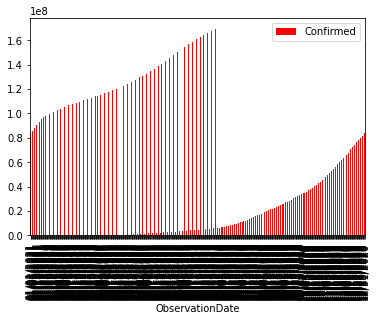

In [18]:
Confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed',color='red')

# Plotted with Seaborn below

<AxesSubplot:xlabel='ObservationDate', ylabel='Confirmed'>

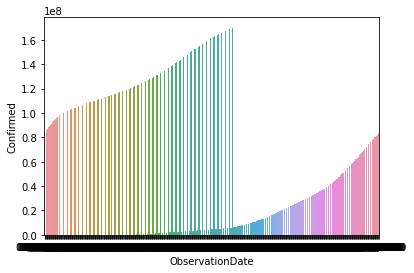

In [19]:
sns.barplot(x=Confirmed['ObservationDate'],y=Confirmed['Confirmed'])

# Plotted through Matplotlib below

<BarContainer object of 494 artists>

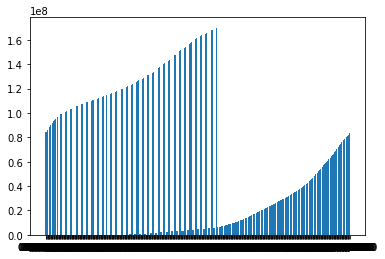

In [20]:
plt.bar(x=Confirmed['ObservationDate'],height=Confirmed['Confirmed'])

# Plotted through Plotly below for number of Confirmed Cases

In [21]:
Confirmed.iplot(kind='bar',x='ObservationDate',y='Confirmed')

# PLotted through Plotly below for  Number of Deaths

In [22]:
Deaths.iplot(kind='bar',x='ObservationDate',y='Deaths',color='red')

# PLotted through Plotly below for  Number of Recovred Cases

In [23]:
Recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',color='green')

# Prediction

In [24]:
from prophet import Prophet

In [25]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0       1.00    0.00       0.00  
1      14.00    0.00       0.00  
2       6.00    0.00       0.00  
3       1.00    0.00       0.00  
4       0.00    0.00       0.00

In [26]:
Confirmed.head()

ObservationDate   Confirmed
0      01/01/2021 84092619.00
1      01/02/2021 84718978.00
2      01/03/2021 85251774.00
3      01/04/2021 85805892.00
4      01/05/2021 86546014.00

In [27]:
Deaths.head()

ObservationDate     Deaths
0      01/01/2021 1834675.00
1      01/02/2021 1843108.00
2      01/03/2021 1850449.00
3      01/04/2021 1860598.00
4      01/05/2021 1875953.00

In [28]:
Recovered.head()

ObservationDate   Recovered
0      01/01/2021 47313005.00
1      01/02/2021 47614297.00
2      01/03/2021 47882779.00
3      01/04/2021 48173187.00
4      01/05/2021 48488548.00

In [29]:
Confirmed.tail()

ObservationDate   Confirmed
489      12/27/2020 80912611.00
490      12/28/2020 81408934.00
491      12/29/2020 82073362.00
492      12/30/2020 82834592.00
493      12/31/2020 83559601.00

In [30]:
Confirmed.head()

ObservationDate   Confirmed
0      01/01/2021 84092619.00
1      01/02/2021 84718978.00
2      01/03/2021 85251774.00
3      01/04/2021 85805892.00
4      01/05/2021 86546014.00

In [31]:
Deaths.tail()

ObservationDate     Deaths
489      12/27/2020 1771659.00
490      12/28/2020 1781415.00
491      12/29/2020 1796786.00
492      12/30/2020 1811843.00
493      12/31/2020 1825012.00

In [32]:
Recovered.tail()

ObservationDate   Recovered
489      12/27/2020 45717710.00
490      12/28/2020 46016136.00
491      12/29/2020 46369231.00
492      12/30/2020 46757476.00
493      12/31/2020 47032627.00

In [33]:
# Date=ds(datestamp, column= y)
# prophet takes dates in yyyy-mm-dd and hh:mm:ss
# so converting in first

# Prediction for Confirmed Cases Worldwide

In [34]:
Confirmed.columns=['ds','y']
Confirmed['ds']=pd.to_datetime(Confirmed['ds'])
Confirmed

ds            y
0   2021-01-01  84092619.00
1   2021-01-02  84718978.00
2   2021-01-03  85251774.00
3   2021-01-04  85805892.00
4   2021-01-05  86546014.00
5   2021-01-06  87329386.00
6   2021-01-07  88210223.00
7   2021-01-08  89013445.00
8   2021-01-09  89774439.00
9   2021-01-10  90363573.00
10  2021-01-11  90983503.00
11  2021-01-12  91689011.00
12  2021-01-13  92437399.00
13  2021-01-14  93192627.00
14  2021-01-15  93959814.00
15  2021-01-16  94598958.00
16  2021-01-17  95128170.00
17  2021-01-18  95643236.00
18  2021-01-19  96251662.00
19  2021-01-20  96944599.00
20  2021-01-21  97600922.00
21  2020-01-22       557.00
22  2021-01-22  98259983.00
23  2020-01-23      1097.00
24  2021-01-23  98828107.00
25  2020-01-24       941.00
26  2021-01-24  99273761.00
27  2020-01-25      1437.00
28  2021-01-25  99771101.00
29  2020-01-26      2118.00
30  2021-01-26 100327339.00
31  2020-01-27      2927.00
32  2021-01-27 100925700.00
33  2020-01-28      5578.00
34  2021-01-28 101539951.00
35  2020-01-29      6165.00
36  2021-01-29 102130394.00
37  2020-01-30      8235.00
38  2021-01-30 102645724.00
39  2020-01-31      9925.00
40  2021-01-31 103027363.00
41  2020-02-01     12038.00
42  2021-02-01 103474137.00
43  2020-02-02     16787.00
44  2021-02-02 103932094.00
45  2020-02-03     19881.00
46  2021-02-03 104454075.00
47  2020-02-04     23892.00
48  2021-02-04 104920982.00
49  2020-02-05     27636.00
50  2021-02-05 105456410.00
51  2020-02-06     30818.00
52  2021-02-06 105828535.00
53  2020-02-07     34392.00
54  2021-02-07 106226613.00
55  2020-02-08     37121.00
56  2021-02-08 106542506.00
57  2020-02-09     40151.00
58  2021-02-09 106970539.00
59  2020-02-10     42763.00
60  2021-02-10 107406280.00
61  2020-02-11     44803.00
62  2021-02-11 107847745.00
63  2020-02-12     45222.00
64  2021-02-12 108276434.00
65  2020-02-13     60370.00
66  2021-02-13 108649735.00
67  2020-02-14     66887.00
68  2021-02-14 108943585.00
69  2020-02-15     69033.00
70  2021-02-15 109226751.00
71  2020-02-16     71226.00
72  2021-02-16 109577771.00
73  2020-02-17     73260.00
74  2021-02-17 109973326.00
75  2020-02-18     75138.00
76  2021-02-18 110376842.00
77  2020-02-19     75641.00
78  2021-02-19 110789361.00
79  2020-02-20     76199.00
80  2021-02-20 111159816.00
81  2020-02-21     76843.00
82  2021-02-21 111474262.00
83  2020-02-22     78599.00
84  2021-02-22 111762700.00
85  2020-02-23     78985.00
86  2021-02-23 112151553.00
87  2020-02-24     79570.00
88  2021-02-24 112596489.00
89  2020-02-25     80415.00
90  2021-02-25 113043967.00
91  2020-02-26     81397.00
92  2021-02-26 113487006.00
93  2020-02-27     82756.00
94  2021-02-27 113876236.00
95  2020-02-28     84125.00
96  2021-02-28 114179745.00
97  2020-02-29     86012.00
98  2020-03-01     88368.00
99  2021-03-01 114485609.00
100 2020-03-02     90311.00
101 2021-03-02 114795897.00
102 2020-03-03     92856.00
103 2021-03-03 115237039.00
104 2020-03-04     95127.00
105 2021-03-04 115690088.00
106 2020-03-05     97936.00
107 2021-03-05 116137142.00
108 2020-03-06    101763.00
109 2021-03-06 116547675.00
110 2020-03-07    105832.00
111 2021-03-07 116915987.00
112 2020-03-08    109820.00
113 2021-03-08 117214710.00
114 2020-03-09    113776.00
115 2021-03-09 117629375.00
116 2020-03-10    118587.00
117 2021-03-10 118096454.00
118 2020-03-11    125850.00
119 2021-03-11 118573350.00
120 2020-03-12    128329.00
121 2021-03-12 119062678.00
122 2020-03-13    145182.00
123 2021-03-13 119516794.00
124 2020-03-14    156084.00
125 2021-03-14 119877179.00
126 2020-03-15    167408.00
127 2021-03-15 120226080.00
128 2020-03-16    181571.00
129 2021-03-16 120699093.00
130 2020-03-17    197205.00
131 2021-03-17 121238378.00
132 2020-03-18    214983.00
133 2021-03-18 121792101.00
134 2020-03-19    242674.00
135 2021-03-19 122353780.00
136 2020-03-20    272268.00
137 2021-03-20 122852600.00
138 2020-03-21    304672.00
139 2021-03-21 123275915.00
140 2020-03-22    337867.00
141 2021-03-22 123692736.00
142 2020

In [35]:
predictModel=Prophet(interval_width=0.96)
predictModel.fit(Confirmed)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future=predictModel.make_future_dataframe(periods=300)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
5   2020-01-27
6   2020-01-28
7   2020-01-29
8   2020-01-30
9   2020-01-31
10  2020-02-01
11  2020-02-02
12  2020-02-03
13  2020-02-04
14  2020-02-05
15  2020-02-06
16  2020-02-07
17  2020-02-08
18  2020-02-09
19  2020-02-10
20  2020-02-11
21  2020-02-12
22  2020-02-13
23  2020-02-14
24  2020-02-15
25  2020-02-16
26  2020-02-17
27  2020-02-18
28  2020-02-19
29  2020-02-20
30  2020-02-21
31  2020-02-22
32  2020-02-23
33  2020-02-24
34  2020-02-25
35  2020-02-26
36  2020-02-27
37  2020-02-28
38  2020-02-29
39  2020-03-01
40  2020-03-02
41  2020-03-03
42  2020-03-04
43  2020-03-05
44  2020-03-06
45  2020-03-07
46  2020-03-08
47  2020-03-09
48  2020-03-10
49  2020-03-11
50  2020-03-12
51  2020-03-13
52  2020-03-14
53  2020-03-15
54  2020-03-16
55  2020-03-17
56  2020-03-18
57  2020-03-19
58  2020-03-20
59  2020-03-21
60  2020-03-22
61  2020-03-23
62  2020-03-24
63  2020-03-25
64  2020-03-26
65  2020-03-27
66  2020-03-28
67  2020-03-29
68  2020-03-30
69  2020-03-31
70  2020-04-01
71  2020-04-02
72  2020-04-03
73  2020-04-04
74  2020-04-05
75  2020-04-06
76  2020-04-07
77  2020-04-08
78  2020-04-09
79  2020-04-10
80  2020-04-11
81  2020-04-12
82  2020-04-13
83  2020-04-14
84  2020-04-15
85  2020-04-16
86  2020-04-17
87  2020-04-18
88  2020-04-19
89  2020-04-20
90  2020-04-21
91  2020-04-22
92  2020-04-23
93  2020-04-24
94  2020-04-25
95  2020-04-26
96  2020-04-27
97  2020-04-28
98  2020-04-29
99  2020-04-30
100 2020-05-01
101 2020-05-02
102 2020-05-03
103 2020-05-04
104 2020-05-05
105 2020-05-06
106 2020-05-07
107 2020-05-08
108 2020-05-09
109 2020-05-10
110 2020-05-11
111 2020-05-12
112 2020-05-13
113 2020-05-14
114 2020-05-15
115 2020-05-16
116 2020-05-17
117 2020-05-18
118 2020-05-19
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24
124 2020-05-25
125 2020-05-26
126 2020-05-27
127 2020-05-28
128 2020-05-29
129 2020-05-30
130 2020-05-31
131 2020-06-01
132 2020-06-02
133 2020-06-03
134 2020-06-04
135 2020-06-05
136 2020-06-06
137 2020-06-07
138 2020-06-08
139 2020-06-09
140 2020-06-10
141 2020-06-11
142 2020-06-12
143 2020-06-13
144 2020-06-14
145 2020-06-15
146 2020-06-16
147 2020-06-17
148 2020-06-18
149 2020-06-19
150 2020-06-20
151 2020-06-21
152 2020-06-22
153 2020-06-23
154 2020-06-24
155 2020-06-25
156 2020-06-26
157 2020-06-27
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05
166 2020-07-06
167 2020-07-07
168 2020-07-08
169 2020-07-09
170 2020-07-10
171 2020-07-11
172 2020-07-12
173 2020-07-13
174 2020-07-14
175 2020-07-15
176 2020-07-16
177 2020-07-17
178 2020-07-18
179 2020-07-19
180 2020-07-20
181 2020-07-21
182 2020-07-22
183 2020-07-23
184 2020-07-24
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03
195 2020-08-04
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11
203 2020-08-12
204 2020-08-13
205 2020-08-14
206 2020-08-15
207 2020-08-16
208 2020-08-17
209 2020-08-18
210 2020-08-19
211 2020-08-20
212 2020-08-21
213 2020-08-22
214 2020-08-23
215 2020-08-24
216 2020-08-25
217 2020-08-26
218 2020-08-27
219 2020-08-28
220 2020-08-29
221 2020-08-30
222 2020-08-31
223 2020-09-01
224 2020-09-02
225 2020-09-03
226 2020-09-04
227 2020-09-05
228 2020-09-06
229 2020-09-07
230 2020-09-08
231 2020-09-09
232 2020-09-10
233 2020-09-11
234 2020-09-12
235 2020-09-13
236 2020-09-14
237 2020-09-15
238 2020-09-16
239 2020-09-17
240 2020-09-18
241 2020-09-19
242 2020-09-20
243 2020-09-21
244 2020-09-22
245 2020-09-23
246 2020-09-24
247 2020-09-25
248 2020-09-26
249 2020-09-27
250 2020-09-28
251 2020-09-29
252 2020-09-30
253 2020-10-01
254 2020-10-02
255 2020-10-03
256 2020-10-04
257 2020-10-05
258 2020-10-06
259 2020-10-07
260 2020-10-08
261 2020-10-09
262 2020-10-10
263 2020-10-11
264 2020-10-12
265 2020-10-13
266 202

In [37]:
future.tail(30)

ds
764 2022-02-24
765 2022-02-25
766 2022-02-26
767 2022-02-27
768 2022-02-28
769 2022-03-01
770 2022-03-02
771 2022-03-03
772 2022-03-04
773 2022-03-05
774 2022-03-06
775 2022-03-07
776 2022-03-08
777 2022-03-09
778 2022-03-10
779 2022-03-11
780 2022-03-12
781 2022-03-13
782 2022-03-14
783 2022-03-15
784 2022-03-16
785 2022-03-17
786 2022-03-18
787 2022-03-19
788 2022-03-20
789 2022-03-21
790 2022-03-22
791 2022-03-23
792 2022-03-24
793 2022-03-25

In [38]:
forecastConfirm=predictModel.predict(future)

In [39]:
forecastConfirm

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-01-22   -127122.23  -2269528.75   1905490.24   -127122.23   
1   2020-01-23   -120120.85  -2322018.25   2049255.72   -120120.85   
2   2020-01-24   -113119.48  -2237349.17   2088589.09   -113119.48   
3   2020-01-25   -106118.10  -2061926.21   2035020.45   -106118.10   
4   2020-01-26    -99116.73  -2215371.61   1912476.76    -99116.73   
5   2020-01-27    -92115.35  -2201720.11   2008024.56    -92115.35   
6   2020-01-28    -85113.97  -2341680.24   1872520.11    -85113.97   
7   2020-01-29    -78112.60  -2383898.81   2102158.88    -78112.60   
8   2020-01-30    -71111.22  -2133036.78   2093286.30    -71111.22   
9   2020-01-31    -64109.85  -2079250.16   2188571.29    -64109.85   
10  2020-02-01    -57108.47  -2121151.96   2044728.81    -57108.47   
11  2020-02-02    -50107.09  -2095822.93   1929653.12    -50107.09   
12  2020-02-03    -43105.72  -2167197.13   1873378.13    -43105.72   
13  2020-02-04    -36104.34  -2198823.40   2006792.30    -36104.34   
14  2020-02-05    -29102.97  -2259503.84   1816893.36    -29102.97   
15  2020-02-06    -22101.59  -2151919.69   2260320.48    -22101.59   
16  2020-02-07    -15100.22  -2065152.40   2068247.51    -15100.22   
17  2020-02-08     -8098.86  -1950713.77   2225338.31     -8098.86   
18  2020-02-09     -1097.51  -2065405.15   2011921.78     -1097.51   
19  2020-02-10      5903.84  -2375314.82   2051567.47      5903.84   
20  2020-02-11     12905.19  -2102156.84   2078514.71     12905.19   
21  2020-02-12     19906.54  -2261857.89   2191287.88     19906.54   
22  2020-02-13     26907.90  -2001981.28   2043076.11     26907.90   
23  2020-02-14     33909.25  -2096773.58   2279254.47     33909.25   
24  2020-02-15     40910.60  -2014028.59   2279010.48     40910.60   
25  2020-02-16     47911.95  -2020189.85   2129753.79     47911.95   
26  2020-02-17     54913.30  -2043980.35   2039077.06     54913.30   
27  2020-02-18     61914.66  -2205450.45   2003479.71     61914.66   
28  2020-02-19     68916.01  -1986510.74   2039972.20     68916.01   
29  2020-02-20     75917.36  -2025350.54   2212904.44     75917.36   
30  2020-02-21     82918.71  -1935680.23   2182686.62     82918.71   
31  2020-02-22     89920.06  -2003375.63   2169785.49     89920.06   
32  2020-02-23     96921.41  -2084110.98   2117398.59     96921.41   
33  2020-02-24    103929.78  -2113680.23   2124863.26    103929.78   
34  2020-02-25    110938.14  -2000857.73   1997879.81    110938.14   
35  2020-02-26    117946.51  -2023180.77   2256384.96    117946.51   
36  2020-02-27    124954.87  -2085896.44   2311475.71    124954.87   
37  2020-02-28    131963.24  -1973073.22   2409300.66    131963.24   
38  2020-02-29    138971.60  -1990240.55   2286893.49    138971.60   
39  2020-03-01    145979.97  -2064713.34   2024361.08    145979.97   
40  2020-03-02    152988.33  -2014073.19   2154137.18    152988.33   
41  2020-03-03    159996.70  -1934235.73   2006370.24    159996.70   
42  2020-03-04    167005.06  -1939051.55   2253416.48    167005.06   
43  2020-03-05    174013.43  -1767597.54   2426440.39    174013.43   
44  2020-03-06    181021.79  -1831730.09   2431692.97    181021.79   
45  2020-03-07    188030.16  -1698628.96   2557184.89    188030.16   
46  2020-03-08    195038.52  -1952385.10   2212233.54    195038.52   
47  2020-03-09    202046.89  -1955560.22   2199977.06    202046.89   
48  2020-03-10    215001.12  -1873140.21   2239626.13    215001.12   
49  2020-03-11    227955.35  -1808638.66   2239109.01    227955.35   
50  2020-03-12    240909.58  -1845684.92   2410579.69    240909.58   
51  2020-03-13    253863.81  -1832006.44   2510003.91    253863.81   
52  2020-03-14    266818.04  -1805222.49   2310724.59    266818.04   
53  2020-03-15    279772.27  -1949674.45   2428612.11    279772.27   
54  2020-03-16    292726.50  -1796804.59   2322184.07    292726.50   
55  2020-03-17    305680.73  -1897375.03   2279900.72    305680.73   
56  2020-03-18    3186

In [40]:
forecastConfirm[['ds','yhat','yhat_lower','yhat_upper']]

ds         yhat   yhat_lower   yhat_upper
0   2020-01-22   -150394.94  -2269528.75   1905490.24
1   2020-01-23    -94622.29  -2322018.25   2049255.72
2   2020-01-24    -48896.28  -2237349.17   2088589.09
3   2020-01-25    -47234.01  -2061926.21   2035020.45
4   2020-01-26   -105242.39  -2215371.61   1912476.76
5   2020-01-27   -151644.16  -2201720.11   2008024.56
6   2020-01-28   -144792.62  -2341680.24   1872520.11
7   2020-01-29   -101385.31  -2383898.81   2102158.88
8   2020-01-30    -45612.66  -2133036.78   2093286.30
9   2020-01-31       113.35  -2079250.16   2188571.29
10  2020-02-01      1775.62  -2121151.96   2044728.81
11  2020-02-02    -56232.76  -2095822.93   1929653.12
12  2020-02-03   -102634.53  -2167197.13   1873378.13
13  2020-02-04    -95782.99  -2198823.40   2006792.30
14  2020-02-05    -52375.68  -2259503.84   1816893.36
15  2020-02-06      3396.97  -2151919.69   2260320.48
16  2020-02-07     49122.98  -2065152.40   2068247.51
17  2020-02-08     50785.22  -1950713.77   2225338.31
18  2020-02-09     -7223.18  -2065405.15   2011921.78
19  2020-02-10    -53624.97  -2375314.82   2051567.47
20  2020-02-11    -46773.46  -2102156.84   2078514.71
21  2020-02-12     -3366.17  -2261857.89   2191287.88
22  2020-02-13     52406.46  -2001981.28   2043076.11
23  2020-02-14     98132.44  -2096773.58   2279254.47
24  2020-02-15     99794.69  -2014028.59   2279010.48
25  2020-02-16     41786.28  -2020189.85   2129753.79
26  2020-02-17     -4615.51  -2043980.35   2039077.06
27  2020-02-18      2236.01  -2205450.45   2003479.71
28  2020-02-19     45643.29  -1986510.74   2039972.20
29  2020-02-20    101415.92  -2025350.54   2212904.44
30  2020-02-21    147141.91  -1935680.23   2182686.62
31  2020-02-22    148804.15  -2003375.63   2169785.49
32  2020-02-23     90795.75  -2084110.98   2117398.59
33  2020-02-24     44400.96  -2113680.23   2124863.26
34  2020-02-25     51259.49  -2000857.73   1997879.81
35  2020-02-26     94673.79  -2023180.77   2256384.96
36  2020-02-27    150453.44  -2085896.44   2311475.71
37  2020-02-28    196186.44  -1973073.22   2409300.66
38  2020-02-29    197855.69  -1990240.55   2286893.49
39  2020-03-01    139854.30  -2064713.34   2024361.08
40  2020-03-02     93459.52  -2014073.19   2154137.18
41  2020-03-03    100318.05  -1934235.73   2006370.24
42  2020-03-04    143732.35  -1939051.55   2253416.48
43  2020-03-05    199511.99  -1767597.54   2426440.39
44  2020-03-06    245244.99  -1831730.09   2431692.97
45  2020-03-07    246914.25  -1698628.96   2557184.89
46  2020-03-08    188912.86  -1952385.10   2212233.54
47  2020-03-09    142518.07  -1955560.22   2199977.06
48  2020-03-10    155322.47  -1873140.21   2239626.13
49  2020-03-11    204682.63  -1808638.66   2239109.01
50  2020-03-12    266408.14  -1845684.92   2410579.69
51  2020-03-13    318087.01  -1832006.44   2510003.91
52  2020-03-14    325702.13  -1805222.49   2310724.59
53  2020-03-15    273646.60  -1949674.45   2428612.11
54  2020-03-16    233197.69  -1796804.59   2322184.07
55  2020-03-17    246002.08  -1897375.03   2279900.72
56  2020-03-18    295362.25  -1744051.54   2622005.89
57  2020-03-19    357087.76  -1754832.44   2350815.66
58  2020-03-20    408766.62  -1690797.99   2558085.93
59  2020-03-21    416381.74  -1780192.82   2500378.06
60  2020-03-22    364326.22  -1628517.41   2419688.16
61  2020-03-23    323877.30  -1705409.12   2343791.79
62  2020-03-24    336681.70  -1870171.50   2407647.20
63  2020-03-25    386041.86  -1895916.62   2617820.28
64  2020-03-26    510743.21  -1584979.89   2655401.71
65  2020-03-27    625397.91  -1606631.03   2730601.91
66  2020-03-28    695988.87  -1626987.21   2661069.00
67  2020-03-29    706909.18  -1378519.14   2780054.31
68  2020-03-30    729436.10  -1268443.14   2830272.22
69  2020-03-31    805216.33  -1323915.14   2996315.07
70  2020-04-01    917552.33  -1159685.06   3051055.36
71  2020-04-02   1042253.68   -909182.00   3182422.66
72  2020-04-03   1156908.38   -940203.35   3451862.87
73  2020-04-04  

In [41]:
forecastConfirm[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

ds         yhat   yhat_lower   yhat_upper
494 2021-05-30 169439526.08 167304821.00 171525185.48
495 2021-05-31 170009812.52 168048714.78 172122492.58
496 2021-06-01 170633352.28 168453010.04 172597431.58
497 2021-06-02 171293447.80 169023079.51 173367993.92
498 2021-06-03 171965908.67 169731724.89 174250559.84
499 2021-06-04 172628322.89 170516440.52 174747455.15
500 2021-06-05 173246673.37 170928118.80 175351632.62
501 2021-06-06 173805353.21 171590313.42 175971949.57
502 2021-06-07 174375639.65 172220718.89 176571799.94
503 2021-06-08 174999179.40 172636647.74 177190139.65
504 2021-06-09 175659274.93 173449689.52 177829320.67
505 2021-06-10 176331735.79 173920385.66 178733244.24
506 2021-06-11 176994150.01 174473092.53 179562763.59
507 2021-06-12 177612500.49 174850803.78 180110737.94
508 2021-06-13 178171180.33 175410001.85 180639210.76
509 2021-06-14 178741466.77 175477088.14 181317599.83
510 2021-06-15 179365006.52 176358486.07 182156607.26
511 2021-06-16 180025102.05 177055508.99 183001118.89
512 2021-06-17 180697562.91 177573261.32 183816139.07
513 2021-06-18 181359977.14 177847710.28 184432475.80
514 2021-06-19 181978327.62 178698507.82 185088055.19
515 2021-06-20 182537007.45 178590702.08 185764357.49
516 2021-06-21 183107293.89 178869387.51 186461917.82
517 2021-06-22 183730833.65 179646723.97 187440802.28
518 2021-06-23 184390929.17 179875106.55 188299654.15
519 2021-06-24 185063390.04 180550673.84 189636682.42
520 2021-06-25 185725804.26 180981155.72 190058554.77
521 2021-06-26 186344154.74 181012925.16 190788093.41
522 2021-06-27 186902834.57 181466038.05 191730176.60
523 2021-06-28 187473121.01 181661464.50 192112912.22
524 2021-06-29 188096660.77 182363701.07 193232004.08
525 2021-06-30 188756756.29 182896821.79 194366076.59
526 2021-07-01 189429217.16 183047529.17 195216471.60
527 2021-07-02 190091631.38 183405788.78 196222975.10
528 2021-07-03 190709981.86 183505419.29 196909286.26
529 2021-07-04 191268661.70 183705295.66 197460240.37
530 2021-07-05 191838948.14 184342439.53 198639218.65
531 2021-07-06 192462487.89 184823233.05 198723446.78
532 2021-07-07 193122583.42 184804494.76 200476845.82
533 2021-07-08 193795044.28 185393505.44 200918442.17
534 2021-07-09 194457458.50 185691063.11 202193651.11
535 2021-07-10 195075808.98 186656478.02 203216085.74
536 2021-07-11 195634488.82 186385890.27 203799274.26
537 2021-07-12 196204775.26 186600566.46 205139978.41
538 2021-07-13 196828315.01 187506170.74 205495515.09
539 2021-07-14 197488410.54 187465034.47 206518625.31
540 2021-07-15 198160871.40 187965366.43 207527061.23
541 2021-07-16 198823285.63 188320164.18 208230053.13
542 2021-07-17 199441636.11 188493603.54 209094530.26
543 2021-07-18 200000315.94 188664896.56 210036309.85
544 2021-07-19 200570602.38 189139232.70 210843530.27
545 2021-07-20 201194142.14 189613444.99 211557821.66
546 2021-07-21 201854237.66 189285579.80 212456184.50
547 2021-07-22 202526698.53 190922466.66 213424104.16
548 2021-07-23 203189112.75 190077171.20 215629511.79
549 2021-07-24 203807463.23 190061907.88 215537277.95
550 2021-07-25 204366143.06 189976084.28 216716579.02
551 2021-07-26 204936429.50 191381663.00 217170536.34
552 2021-07-27 205559969.26 191855771.65 218077313.34
553 2021-07-28 206220064.78 192519957.75 218933274.57
554 2021-07-29 206892525.65 192435581.05 220462977.39
555 2021-07-30 207554939.87 192377489.85 221338686.26
556 2021-07-31 208173290.35 192727394.92 223015613.77
557 2021-08-01 208731970.19 193093385.08 223300303.10
558 2021-08-02 209302256.63 193555428.98 223562011.35
559 2021-08-03 209925796.38 193688703.96 224434060.85
560 2021-08-04 210585891.91 193828300.43 225817486.67
561 2021-08-05 211258352.77 194188516.53 227471871.17
562 2021-08-06 211920766.99 194908889.83 227431011.53
563 2021-08-07 212539117.47 194939840.07 228540620.75
564 2021-08-08 213097797.31 195276463.45 230643783.35
565 2021-08-09 213668083.75 195442472.62 230663989.44
566 2021-08-10 214291623.50 196576496.50 231479394.28
567 2021-08-11 2

In [42]:
forecastConfirm.iplot(kind='bar',x='ds',y='yhat',color='purple')

In [43]:
forecastConfirm.iplot(mode='markers+text',kind='scatter',x='ds',y='yhat_upper',color='purple')

# Visualization for Confirmed Cases Worldwide

# Prediction for Deathtoll Worldwide

In [44]:
Deaths.columns=['ds','y']
Deaths['ds']=pd.to_datetime(Deaths['ds'])
Deaths

ds          y
0   2021-01-01 1834675.00
1   2021-01-02 1843108.00
2   2021-01-03 1850449.00
3   2021-01-04 1860598.00
4   2021-01-05 1875953.00
5   2021-01-06 1891006.00
6   2021-01-07 1905926.00
7   2021-01-08 1921092.00
8   2021-01-09 1933877.00
9   2021-01-10 1942225.00
10  2021-01-11 1952549.00
11  2021-01-12 1969887.00
12  2021-01-13 1986359.00
13  2021-01-14 2001730.00
14  2021-01-15 2016841.00
15  2021-01-16 2030089.00
16  2021-01-17 2038753.00
17  2021-01-18 2048179.00
18  2021-01-19 2065030.00
19  2021-01-20 2082668.00
20  2021-01-21 2099457.00
21  2020-01-22      17.00
22  2021-01-22 2115478.00
23  2020-01-23      34.00
24  2021-01-23 2128772.00
25  2020-01-24      26.00
26  2021-01-24 2137740.00
27  2020-01-25      42.00
28  2021-01-25 2148508.00
29  2020-01-26      56.00
30  2021-01-26 2165816.00
31  2020-01-27      82.00
32  2021-01-27 2182496.00
33  2020-01-28     131.00
34  2021-01-28 2199547.00
35  2020-01-29     133.00
36  2021-01-29 2214494.00
37  2020-01-30     171.00
38  2021-01-30 2228080.00
39  2020-01-31     213.00
40  2021-01-31 2236070.00
41  2020-02-01     259.00
42  2021-02-01 2246288.00
43  2020-02-02     362.00
44  2021-02-02 2261124.00
45  2020-02-03     426.00
46  2021-02-03 2276852.00
47  2020-02-04     492.00
48  2021-02-04 2289386.00
49  2020-02-05     564.00
50  2021-02-05 2305957.00
51  2020-02-06     634.00
52  2021-02-06 2316094.00
53  2020-02-07     719.00
54  2021-02-07 2324080.00
55  2020-02-08     806.00
56  2021-02-08 2332412.00
57  2020-02-09     906.00
58  2021-02-09 2347949.00
59  2020-02-10    1013.00
60  2021-02-10 2361352.00
61  2020-02-11    1113.00
62  2021-02-11 2374826.00
63  2020-02-12    1118.00
64  2021-02-12 2387299.00
65  2020-02-13    1371.00
66  2021-02-13 2397104.00
67  2020-02-14    1523.00
68  2021-02-14 2403466.00
69  2020-02-15    1666.00
70  2021-02-15 2410360.00
71  2020-02-16    1770.00
72  2021-02-16 2421278.00
73  2020-02-17    1868.00
74  2021-02-17 2432617.00
75  2020-02-18    2007.00
76  2021-02-18 2443987.00
77  2020-02-19    2122.00
78  2021-02-19 2455035.00
79  2020-02-20    2247.00
80  2021-02-20 2463547.00
81  2020-02-21    2251.00
82  2021-02-21 2469427.00
83  2020-02-22    2458.00
84  2021-02-22 2476376.00
85  2020-02-23    2469.00
86  2021-02-23 2487556.00
87  2020-02-24    2629.00
88  2021-02-24 2499559.00
89  2020-02-25    2708.00
90  2021-02-25 2509724.00
91  2020-02-26    2770.00
92  2021-02-26 2519974.00
93  2020-02-27    2814.00
94  2021-02-27 2528114.00
95  2020-02-28    2872.00
96  2021-02-28 2533548.00
97  2020-02-29    2941.00
98  2020-03-01    2996.00
99  2021-03-01 2540757.00
100 2020-03-02    3085.00
101 2021-03-02 2551191.00
102 2020-03-03    3160.00
103 2021-03-03 2562264.00
104 2020-03-04    3254.00
105 2021-03-04 2572042.00
106 2020-03-05    3349.00
107 2021-03-05 2582059.00
108 2020-03-06    3460.00
109 2021-03-06 2589891.00
110 2020-03-07    3563.00
111 2021-03-07 2595165.00
112 2020-03-08    3803.00
113 2021-03-08 2602025.00
114 2020-03-09    4002.00
115 2021-03-09 2612006.00
116 2020-03-10    4262.00
117 2021-03-10 2621697.00
118 2020-03-11    4615.00
119 2021-03-11 2631464.00
120 2020-03-12    4720.00
121 2021-03-12 2641092.00
122 2020-03-13    5404.00
123 2021-03-13 2649078.00
124 2020-03-14    5819.00
125 2021-03-14 2654577.00
126 2020-03-15    6440.00
127 2021-03-15 2661398.00
128 2020-03-16    7126.00
129 2021-03-16 2671288.00
130 2020-03-17    7906.00
131 2021-03-17 2681413.00
132 2020-03-18    8736.00
133 2021-03-18 2691987.00
134 2020-03-19    9869.00
135 2021-03-19 2702386.00
136 2020-03-20   11300.00
137 2021-03-20 2710432.00
138 2020-03-21   12972.00
139 2021-03-21 2716233.00
140 2020-03-22   14633.00
141 2021-03-22 2723729.00
142 2020-03-23   16527.00
143 2021-03-23 2734835.00
144 2020-03-24   18635.00
145 2021-03-24 2744557.00
146 2020-03-25   21207.00
147 2021-03-25 2755896.00
148 2020-03-26   24005.00
149 2021-03-26 2768118.00
150 2020-03-27   27230.00
151 2021-03-27 2777955.00
152 2020-03-28   30691.00
153 2021

In [45]:
predictModel=Prophet(interval_width=0.96)
predictModel.fit(Deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
forecastDeaths=predictModel.predict(future)
forecastDeaths

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-01-22   -1058.80   -27042.78    23434.97     -1058.80     -1058.80   
1   2020-01-23    -957.97   -26505.47    25124.43      -957.97      -957.97   
2   2020-01-24    -857.13   -25346.25    26225.13      -857.13      -857.13   
3   2020-01-25    -756.30   -27223.94    27852.63      -756.30      -756.30   
4   2020-01-26    -655.46   -27806.53    23856.11      -655.46      -655.46   
5   2020-01-27    -554.63   -27430.04    22385.01      -554.63      -554.63   
6   2020-01-28    -453.80   -27625.75    22388.55      -453.80      -453.80   
7   2020-01-29    -352.96   -26869.38    24579.35      -352.96      -352.96   
8   2020-01-30    -252.13   -25141.03    25244.65      -252.13      -252.13   
9   2020-01-31    -151.29   -22412.98    26645.35      -151.29      -151.29   
10  2020-02-01     -50.46   -24248.15    27359.65       -50.46       -50.46   
11  2020-02-02      50.37   -27582.44    25689.92        50.37        50.37   
12  2020-02-03     151.21   -28424.42    25289.13       151.21       151.21   
13  2020-02-04     252.04   -26784.24    23006.20       252.04       252.04   
14  2020-02-05     352.88   -24784.35    24876.26       352.88       352.88   
15  2020-02-06     453.71   -22403.79    27176.43       453.71       453.71   
16  2020-02-07     554.54   -23106.40    29856.71       554.54       554.54   
17  2020-02-08     655.38   -24973.48    28891.24       655.38       655.38   
18  2020-02-09     756.21   -25419.79    23959.60       756.21       756.21   
19  2020-02-10     857.05   -29020.84    23374.50       857.05       857.05   
20  2020-02-11     957.88   -27183.78    22838.27       957.88       957.88   
21  2020-02-12    1058.71   -24850.73    27348.30      1058.71      1058.71   
22  2020-02-13    1159.55   -24063.64    27482.73      1159.55      1159.55   
23  2020-02-14    1260.38   -23782.03    29693.72      1260.38      1260.38   
24  2020-02-15    1361.21   -23368.55    30390.44      1361.21      1361.21   
25  2020-02-16    1462.05   -27238.88    28642.08      1462.05      1462.05   
26  2020-02-17    1562.88   -28833.11    25099.33      1562.88      1562.88   
27  2020-02-18    1663.72   -25302.56    25098.47      1663.72      1663.72   
28  2020-02-19    1764.55   -22371.67    28762.81      1764.55      1764.55   
29  2020-02-20    1865.38   -22207.41    29114.17      1865.38      1865.38   
30  2020-02-21    1966.22   -22426.32    29284.44      1966.22      1966.22   
31  2020-02-22    2067.05   -23841.82    28921.06      2067.05      2067.05   
32  2020-02-23    2167.88   -22504.67    26055.57      2167.88      2167.88   
33  2020-02-24    2268.72   -24942.69    27205.04      2268.72      2268.72   
34  2020-02-25    2369.55   -24959.41    27685.19      2369.55      2369.55   
35  2020-02-26    2470.38   -22436.07    28242.17      2470.38      2470.38   
36  2020-02-27    2571.22   -20633.38    28163.80      2571.22      2571.22   
37  2020-02-28    2672.05   -21347.73    31036.72      2672.05      2672.05   
38  2020-02-29    2772.88   -20643.70    29902.27      2772.88      2772.88   
39  2020-03-01    2873.71   -25762.02    28713.90      2873.71      2873.71   
40  2020-03-02    2974.55   -22909.52    26167.42      2974.55      2974.55   
41  2020-03-03    3075.38   -24427.29    28214.16      3075.38      3075.38   
42  2020-03-04    3176.21   -22068.79    30296.63      3176.21      3176.21   
43  2020-03-05    3277.05   -21760.49    29133.36      3277.05      3277.05   
44  2020-03-06    3377.88   -20565.08    29710.05      3377.88      3377.88   
45  2020-03-07    3478.71   -22721.37    30797.98      3478.71      3478.71   
46  2020-03-08    3579.54   -26440.81    28709.73      3579.54      3579.54   
47  2020-03-09    3680.38   -22818.00    25572.44      3680.38      3680.38   
48  2020-03-10    4401.37   -24417.49    30156.01      4401.37      4401.37   
49  2020-03-11    5122.36   -22011.09    30075.25      5122.36

In [47]:
forecastDeaths[['ds','yhat','yhat_lower','yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0   2020-01-22   -1013.81   -27042.78    23434.97
1   2020-01-23     143.04   -26505.47    25124.43
2   2020-01-24    1117.70   -25346.25    26225.13
3   2020-01-25     813.32   -27223.94    27852.63
4   2020-01-26   -1659.62   -27806.53    23856.11
5   2020-01-27   -2967.69   -27430.04    22385.01
6   2020-01-28   -1727.03   -27625.75    22388.55
7   2020-01-29    -307.97   -26869.38    24579.35
8   2020-01-30     848.88   -25141.03    25244.65
9   2020-01-31    1823.54   -22412.98    26645.35
10  2020-02-01    1519.16   -24248.15    27359.65
11  2020-02-02    -953.78   -27582.44    25689.92
12  2020-02-03   -2261.85   -28424.42    25289.13
13  2020-02-04   -1021.20   -26784.24    23006.20
14  2020-02-05     397.87   -24784.35    24876.26
15  2020-02-06    1554.72   -22403.79    27176.43
16  2020-02-07    2529.38   -23106.40    29856.71
17  2020-02-08    2225.00   -24973.48    28891.24
18  2020-02-09    -247.94   -25419.79    23959.60
19  2020-02-10   -1556.02   -29020.84    23374.50
20  2020-02-11    -315.36   -27183.78    22838.27
21  2020-02-12    1103.70   -24850.73    27348.30
22  2020-02-13    2260.56   -24063.64    27482.73
23  2020-02-14    3235.21   -23782.03    29693.72
24  2020-02-15    2930.84   -23368.55    30390.44
25  2020-02-16     457.89   -27238.88    28642.08
26  2020-02-17    -850.18   -28833.11    25099.33
27  2020-02-18     390.48   -25302.56    25098.47
28  2020-02-19    1809.54   -22371.67    28762.81
29  2020-02-20    2966.39   -22207.41    29114.17
30  2020-02-21    3941.05   -22426.32    29284.44
31  2020-02-22    3636.67   -23841.82    28921.06
32  2020-02-23    1163.73   -22504.67    26055.57
33  2020-02-24    -144.34   -24942.69    27205.04
34  2020-02-25    1096.31   -24959.41    27685.19
35  2020-02-26    2515.37   -22436.07    28242.17
36  2020-02-27    3672.22   -20633.38    28163.80
37  2020-02-28    4646.88   -21347.73    31036.72
38  2020-02-29    4342.50   -20643.70    29902.27
39  2020-03-01    1869.56   -25762.02    28713.90
40  2020-03-02     561.49   -22909.52    26167.42
41  2020-03-03    1802.14   -24427.29    28214.16
42  2020-03-04    3221.21   -22068.79    30296.63
43  2020-03-05    4378.05   -21760.49    29133.36
44  2020-03-06    5352.71   -20565.08    29710.05
45  2020-03-07    5048.33   -22721.37    30797.98
46  2020-03-08    2575.39   -26440.81    28709.73
47  2020-03-09    1267.32   -22818.00    25572.44
48  2020-03-10    3128.13   -24417.49    30156.01
49  2020-03-11    5167.36   -22011.09    30075.25
50  2020-03-12    6944.36   -19421.10    32380.28
51  2020-03-13    8539.18   -16637.14    34250.34
52  2020-03-14    8854.96   -16983.25    35493.11
53  2020-03-15    7002.18   -18793.20    31712.62
54  2020-03-16    6314.27   -19347.18    34094.38
55  2020-03-17    8175.08   -18211.41    33797.68
56  2020-03-18   10214.30   -16681.26    36721.61
57  2020-03-19   11991.31   -14929.21    37796.44
58  2020-03-20   13586.13   -10878.97    41768.96
59  2020-03-21   13901.91   -12087.64    40927.04
60  2020-03-22   12049.13   -13421.76    38390.97
61  2020-03-23   11361.22   -15091.18    38567.38
62  2020-03-24   13222.03   -14530.34    39101.41
63  2020-03-25   15261.25   -10952.05    39495.22
64  2020-03-26   21902.76    -5115.39    49195.04
65  2020-03-27   28362.07     1643.40    56093.61
66  2020-03-28   33542.35     7002.73    61039.46
67  2020-03-29   36554.07    10485.96    63323.03
68  2020-03-30   40730.65    14328.11    66664.95
69  2020-03-31   47455.96    18600.34    74353.19
70  2020-04-01   54359.68    28769.46    80650.16
71  2020-04-02   61001.19    34290.64    87782.39
72  2020-04-03   67460.50    39992.16    94485.24
73  2020-04-04   72640.78    45491.90    99242.85
74  2020-04-05   75652.49    49817.95   102480.20
75  2020-04-06   79829.08    52163.26   107885.59
76  2020-04-07   86554.39    60020.57   112397.13
77  2020-04-08   93458.11    68948.45   121058.10
78  2020-04-09  100099.62    73552.98   126966.64
79  2020-04-

In [48]:
forecastDeaths[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

ds       yhat  yhat_lower  yhat_upper
494 2021-05-30 3507163.45  3480778.21  3534426.72
495 2021-05-31 3516689.72  3493246.11  3545625.19
496 2021-06-01 3528764.72  3503737.01  3555309.18
497 2021-06-02 3541018.13  3515081.30  3567937.04
498 2021-06-03 3553009.33  3526714.71  3580603.32
499 2021-06-04 3564818.33  3539632.32  3590834.47
500 2021-06-05 3575348.30  3548340.97  3600019.56
501 2021-06-06 3583709.71  3556400.42  3610210.61
502 2021-06-07 3593235.98  3567310.08  3621980.19
503 2021-06-08 3605310.98  3577801.64  3633762.57
504 2021-06-09 3617564.39  3588877.31  3648520.35
505 2021-06-10 3629555.59  3601187.35  3664867.63
506 2021-06-11 3641364.59  3609528.22  3674301.15
507 2021-06-12 3651894.56  3616687.56  3685950.44
508 2021-06-13 3660255.97  3628633.12  3697203.28
509 2021-06-14 3669782.24  3636121.70  3707246.41
510 2021-06-15 3681857.24  3642922.84  3723919.03
511 2021-06-16 3694110.65  3655173.93  3738619.76
512 2021-06-17 3706101.85  3663380.07  3754164.41
513 2021-06-18 3717910.85  3676574.29  3768605.37
514 2021-06-19 3728440.82  3682523.24  3785164.56
515 2021-06-20 3736802.23  3689622.13  3798409.67
516 2021-06-21 3746328.50  3695667.03  3810981.84
517 2021-06-22 3758403.50  3710490.30  3826708.64
518 2021-06-23 3770656.91  3718478.99  3842922.61
519 2021-06-24 3782648.11  3726486.22  3859034.58
520 2021-06-25 3794457.11  3732908.83  3873165.17
521 2021-06-26 3804987.08  3742241.09  3881385.33
522 2021-06-27 3813348.49  3745303.76  3900724.12
523 2021-06-28 3822874.76  3752813.77  3920653.72
524 2021-06-29 3834949.76  3759608.76  3932131.04
525 2021-06-30 3847203.17  3774818.07  3944421.78
526 2021-07-01 3859194.37  3782196.80  3971340.30
527 2021-07-02 3871003.37  3791396.78  3980623.00
528 2021-07-03 3881533.34  3796403.77  3996912.70
529 2021-07-04 3889894.75  3803442.54  3994820.50
530 2021-07-05 3899421.02  3812199.97  4023760.66
531 2021-07-06 3911496.02  3814504.28  4035893.98
532 2021-07-07 3923749.43  3827678.16  4059902.28
533 2021-07-08 3935740.63  3824804.37  4065412.53
534 2021-07-09 3947549.63  3838668.75  4090725.94
535 2021-07-10 3958079.60  3842789.33  4098526.55
536 2021-07-11 3966441.01  3851454.77  4114545.86
537 2021-07-12 3975967.28  3862152.67  4130429.08
538 2021-07-13 3988042.28  3870489.96  4143893.27
539 2021-07-14 4000295.69  3881074.76  4157738.75
540 2021-07-15 4012286.89  3884455.02  4179842.25
541 2021-07-16 4024095.89  3885951.80  4192862.27
542 2021-07-17 4034625.86  3895261.96  4217191.95
543 2021-07-18 4042987.27  3905252.23  4215226.11
544 2021-07-19 4052513.54  3905351.28  4237668.46
545 2021-07-20 4064588.54  3913982.17  4251057.47
546 2021-07-21 4076841.95  3916353.77  4259437.07
547 2021-07-22 4088833.15  3931903.83  4295132.39
548 2021-07-23 4100642.15  3930426.33  4304644.39
549 2021-07-24 4111172.12  3949167.22  4307916.39
550 2021-07-25 4119533.53  3956013.86  4344287.14
551 2021-07-26 4129059.80  3961334.22  4343595.53
552 2021-07-27 4141134.80  3968082.19  4360470.89
553 2021-07-28 4153388.21  3958668.04  4380563.23
554 2021-07-29 4165379.41  3969493.76  4399804.82
555 2021-07-30 4177188.41  3981787.87  4413206.60
556 2021-07-31 4187718.38  3991918.41  4426326.39
557 2021-08-01 4196079.79  3990520.04  4444526.51
558 2021-08-02 4205606.06  3996992.20  4462310.20
559 2021-08-03 4217681.06  4003202.40  4477296.94
560 2021-08-04 4229934.47  4017447.92  4494223.16
561 2021-08-05 4241925.67  4016207.55  4511069.30
562 2021-08-06 4253734.67  4024566.95  4526285.49
563 2021-08-07 4264264.64  4031786.93  4534830.53
564 2021-08-08 4272626.05  4041920.70  4540998.90
565 2021-08-09 4282152.32  4037728.73  4570417.29
566 2021-08-10 4294227.32  4043848.31  4582610.73
567 2021-08-11 4306480.73  4051987.90  4598204.21
568 2021-08-12 4318471.93  4058540.72  4627316.24
569 2021-08-13 4330280.93  4067960.44  4646294.19
570 2021-08-14 4340810.90  4066962.26  4649726.04
571 2021-08-15 4349172.31  4077788.30  4668552.32
572 2021-08-16 4358698.58  4075732.11  4685005.97
573 2021-08-

In [49]:
forecastDeaths.iplot(kind='bar',x='ds',y='yhat_upper',color='red')

In [50]:
forecastDeaths.iplot(mode='markers+text',kind='scatter',x='ds',y='yhat_upper',color='red')

# Visualization for Deathtoll Worldwide

# Prediction for Recovered Cases Worlwide

In [51]:
Recovered.columns=['ds','y']
Recovered['ds']=pd.to_datetime(Recovered['ds'])
Recovered

ds            y
0   2021-01-01  47313005.00
1   2021-01-02  47614297.00
2   2021-01-03  47882779.00
3   2021-01-04  48173187.00
4   2021-01-05  48488548.00
5   2021-01-06  48801673.00
6   2021-01-07  49125604.00
7   2021-01-08  49422867.00
8   2021-01-09  49753112.00
9   2021-01-10  50023662.00
10  2021-01-11  50313950.00
11  2021-01-12  50657507.00
12  2021-01-13  51023568.00
13  2021-01-14  51396413.00
14  2021-01-15  51717035.00
15  2021-01-16  52034090.00
16  2021-01-17  52349805.00
17  2021-01-18  52668558.00
18  2021-01-19  53071502.00
19  2021-01-20  53399273.00
20  2021-01-21  53765412.00
21  2020-01-22        30.00
22  2021-01-22  54147169.00
23  2020-01-23        60.00
24  2021-01-23  54463662.00
25  2020-01-24        39.00
26  2021-01-24  54774619.00
27  2020-01-25        42.00
28  2021-01-25  55089060.00
29  2020-01-26        56.00
30  2021-01-26  55418603.00
31  2020-01-27        65.00
32  2021-01-27  55759372.00
33  2020-01-28       108.00
34  2021-01-28  56075031.00
35  2020-01-29       127.00
36  2021-01-29  56439138.00
37  2020-01-30       145.00
38  2021-01-30  56790304.00
39  2020-01-31       225.00
40  2021-01-31  57079203.00
41  2020-02-01       287.00
42  2021-02-01  57351845.00
43  2020-02-02       476.00
44  2021-02-02  57702035.00
45  2020-02-03       627.00
46  2021-02-03  58031882.00
47  2020-02-04       857.00
48  2021-02-04  58325871.00
49  2020-02-05      1129.00
50  2021-02-05  58607158.00
51  2020-02-06      1492.00
52  2021-02-06  58901715.00
53  2020-02-07      2016.00
54  2021-02-07  59179150.00
55  2020-02-08      2616.00
56  2021-02-08  59411984.00
57  2020-02-09      3245.00
58  2021-02-09  59783592.00
59  2020-02-10      3947.00
60  2021-02-10  60052900.00
61  2020-02-11      4684.00
62  2021-02-11  60328985.00
63  2020-02-12      5151.00
64  2021-02-12  60616584.00
65  2020-02-13      6294.00
66  2021-02-13  60862827.00
67  2020-02-14      8057.00
68  2021-02-14  61058258.00
69  2020-02-15      9396.00
70  2021-02-15  61346871.00
71  2020-02-16     10866.00
72  2021-02-16  61582276.00
73  2020-02-17     12583.00
74  2021-02-17  61876217.00
75  2020-02-18     14352.00
76  2021-02-18  62112835.00
77  2020-02-19     16121.00
78  2021-02-19  62347471.00
79  2020-02-20     18179.00
80  2021-02-20  62616687.00
81  2020-02-21     18892.00
82  2021-02-21  62833944.00
83  2020-02-22     22889.00
84  2021-02-22  63016514.00
85  2020-02-23     23394.00
86  2021-02-23  63295144.00
87  2020-02-24     25227.00
88  2021-02-24  63504603.00
89  2020-02-25     27905.00
90  2021-02-25  63732295.00
91  2020-02-26     30386.00
92  2021-02-26  63992563.00
93  2020-02-27     33278.00
94  2021-02-27  64243285.00
95  2020-02-28     36710.00
96  2021-02-28  64418462.00
97  2020-02-29     39781.00
98  2020-03-01     42717.00
99  2021-03-01  64633388.00
100 2020-03-02     45601.00
101 2021-03-02  64903492.00
102 2020-03-03     48228.00
103 2021-03-03  65132900.00
104 2020-03-04     51170.00
105 2021-03-04  65383180.00
106 2020-03-05     53796.00
107 2021-03-05  65609540.00
108 2020-03-06     55864.00
109 2021-03-06  65846043.00
110 2020-03-07     58357.00
111 2021-03-07  66084363.00
112 2020-03-08     60695.00
113 2021-03-08  66358921.00
114 2020-03-09     62512.00
115 2021-03-09  66621154.00
116 2020-03-10     64400.00
117 2021-03-10  66856510.00
118 2020-03-11     66999.00
119 2021-03-11  67129127.00
120 2020-03-12     68321.00
121 2021-03-12  67397683.00
122 2020-03-13     70248.00
123 2021-03-13  67650215.00
124 2020-03-14     72622.00
125 2021-03-14  67895903.00
126 2020-03-15     76033.00
127 2021-03-15  68185782.00
128 2020-03-16     78088.00
129 2021-03-16  68452267.00
130 2020-03-17     80832.00
131 2021-03-17  68716803.00
132 2020-03-18     83308.00
133 2021-03-18  68985879.00
134 2020-03-19     84961.00
135 2021-03-19  69264940.00
136 2020-03-20     87402.00
137 2021-03-20  69523151.00
138 2020-03-21     91655.00
139 2021-03-21  69803250.00
140 2020-03-22     97225.00
141 2021-03-22  70137879.00
142 2020

In [52]:
predictModel=Prophet(interval_width=0.96)
predictModel.fit(Recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future=predictModel.make_future_dataframe(periods=300)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
5   2020-01-27
6   2020-01-28
7   2020-01-29
8   2020-01-30
9   2020-01-31
10  2020-02-01
11  2020-02-02
12  2020-02-03
13  2020-02-04
14  2020-02-05
15  2020-02-06
16  2020-02-07
17  2020-02-08
18  2020-02-09
19  2020-02-10
20  2020-02-11
21  2020-02-12
22  2020-02-13
23  2020-02-14
24  2020-02-15
25  2020-02-16
26  2020-02-17
27  2020-02-18
28  2020-02-19
29  2020-02-20
30  2020-02-21
31  2020-02-22
32  2020-02-23
33  2020-02-24
34  2020-02-25
35  2020-02-26
36  2020-02-27
37  2020-02-28
38  2020-02-29
39  2020-03-01
40  2020-03-02
41  2020-03-03
42  2020-03-04
43  2020-03-05
44  2020-03-06
45  2020-03-07
46  2020-03-08
47  2020-03-09
48  2020-03-10
49  2020-03-11
50  2020-03-12
51  2020-03-13
52  2020-03-14
53  2020-03-15
54  2020-03-16
55  2020-03-17
56  2020-03-18
57  2020-03-19
58  2020-03-20
59  2020-03-21
60  2020-03-22
61  2020-03-23
62  2020-03-24
63  2020-03-25
64  2020-03-26
65  2020-03-27
66  2020-03-28
67  2020-03-29
68  2020-03-30
69  2020-03-31
70  2020-04-01
71  2020-04-02
72  2020-04-03
73  2020-04-04
74  2020-04-05
75  2020-04-06
76  2020-04-07
77  2020-04-08
78  2020-04-09
79  2020-04-10
80  2020-04-11
81  2020-04-12
82  2020-04-13
83  2020-04-14
84  2020-04-15
85  2020-04-16
86  2020-04-17
87  2020-04-18
88  2020-04-19
89  2020-04-20
90  2020-04-21
91  2020-04-22
92  2020-04-23
93  2020-04-24
94  2020-04-25
95  2020-04-26
96  2020-04-27
97  2020-04-28
98  2020-04-29
99  2020-04-30
100 2020-05-01
101 2020-05-02
102 2020-05-03
103 2020-05-04
104 2020-05-05
105 2020-05-06
106 2020-05-07
107 2020-05-08
108 2020-05-09
109 2020-05-10
110 2020-05-11
111 2020-05-12
112 2020-05-13
113 2020-05-14
114 2020-05-15
115 2020-05-16
116 2020-05-17
117 2020-05-18
118 2020-05-19
119 2020-05-20
120 2020-05-21
121 2020-05-22
122 2020-05-23
123 2020-05-24
124 2020-05-25
125 2020-05-26
126 2020-05-27
127 2020-05-28
128 2020-05-29
129 2020-05-30
130 2020-05-31
131 2020-06-01
132 2020-06-02
133 2020-06-03
134 2020-06-04
135 2020-06-05
136 2020-06-06
137 2020-06-07
138 2020-06-08
139 2020-06-09
140 2020-06-10
141 2020-06-11
142 2020-06-12
143 2020-06-13
144 2020-06-14
145 2020-06-15
146 2020-06-16
147 2020-06-17
148 2020-06-18
149 2020-06-19
150 2020-06-20
151 2020-06-21
152 2020-06-22
153 2020-06-23
154 2020-06-24
155 2020-06-25
156 2020-06-26
157 2020-06-27
158 2020-06-28
159 2020-06-29
160 2020-06-30
161 2020-07-01
162 2020-07-02
163 2020-07-03
164 2020-07-04
165 2020-07-05
166 2020-07-06
167 2020-07-07
168 2020-07-08
169 2020-07-09
170 2020-07-10
171 2020-07-11
172 2020-07-12
173 2020-07-13
174 2020-07-14
175 2020-07-15
176 2020-07-16
177 2020-07-17
178 2020-07-18
179 2020-07-19
180 2020-07-20
181 2020-07-21
182 2020-07-22
183 2020-07-23
184 2020-07-24
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03
195 2020-08-04
196 2020-08-05
197 2020-08-06
198 2020-08-07
199 2020-08-08
200 2020-08-09
201 2020-08-10
202 2020-08-11
203 2020-08-12
204 2020-08-13
205 2020-08-14
206 2020-08-15
207 2020-08-16
208 2020-08-17
209 2020-08-18
210 2020-08-19
211 2020-08-20
212 2020-08-21
213 2020-08-22
214 2020-08-23
215 2020-08-24
216 2020-08-25
217 2020-08-26
218 2020-08-27
219 2020-08-28
220 2020-08-29
221 2020-08-30
222 2020-08-31
223 2020-09-01
224 2020-09-02
225 2020-09-03
226 2020-09-04
227 2020-09-05
228 2020-09-06
229 2020-09-07
230 2020-09-08
231 2020-09-09
232 2020-09-10
233 2020-09-11
234 2020-09-12
235 2020-09-13
236 2020-09-14
237 2020-09-15
238 2020-09-16
239 2020-09-17
240 2020-09-18
241 2020-09-19
242 2020-09-20
243 2020-09-21
244 2020-09-22
245 2020-09-23
246 2020-09-24
247 2020-09-25
248 2020-09-26
249 2020-09-27
250 2020-09-28
251 2020-09-29
252 2020-09-30
253 2020-10-01
254 2020-10-02
255 2020-10-03
256 2020-10-04
257 2020-10-05
258 2020-10-06
259 2020-10-07
260 2020-10-08
261 2020-10-09
262 2020-10-10
263 2020-10-11
264 2020-10-12
265 2020-10-13
266 202

In [54]:
Recovered.tail(300)

ds            y
194 2020-04-18    592521.00
195 2021-04-18  80839359.00
196 2020-04-19    624233.00
197 2021-04-19  81374734.00
198 2020-04-20    646256.00
199 2021-04-20  81979571.00
200 2020-04-21    680296.00
201 2021-04-21  82491871.00
202 2020-04-22    709831.00
203 2021-04-22  83128167.00
204 2020-04-23    738573.00
205 2021-04-23  83767999.00
206 2020-04-24    793485.00
207 2021-04-24  84344290.00
208 2020-04-25    816726.00
209 2021-04-25  84878104.00
210 2020-04-26    865981.00
211 2021-04-26  85565470.00
212 2020-04-27    894330.00
213 2021-04-27  86246374.00
214 2020-04-28    928962.00
215 2021-04-28  86843039.00
216 2020-04-29    972918.00
217 2021-04-29  87550355.00
218 2020-04-30   1015102.00
219 2021-04-30  88236951.00
220 2020-05-01   1053580.00
221 2021-05-01  88919401.00
222 2020-05-02   1093137.00
223 2021-05-02  89612415.00
224 2020-05-03   1125478.00
225 2021-05-03  90255904.00
226 2020-05-04   1162965.00
227 2021-05-04  90912804.00
228 2020-05-05   1199006.00
229 2021-05-05  91626286.00
230 2020-05-06   1245700.00
231 2021-05-06  92301898.00
232 2020-05-07   1285085.00
233 2021-05-07  92998027.00
234 2020-05-08   1322257.00
235 2021-05-08  93709032.00
236 2020-05-09   1375722.00
237 2021-05-09  94371825.00
238 2020-05-10   1409293.00
239 2021-05-10  95000511.00
240 2020-05-11   1456413.00
241 2021-05-11  95751515.00
242 2020-05-12   1493639.00
243 2021-05-12  96399064.00
244 2020-05-13   1548788.00
245 2021-05-13  97089181.00
246 2020-05-14   1588129.00
247 2021-05-14  97754528.00
248 2020-05-15   1637398.00
249 2021-05-15  98397065.00
250 2020-05-16   1693347.00
251 2021-05-16  99064469.00
252 2020-05-17   1734214.00
253 2021-05-17  99808931.00
254 2020-05-18   1787121.00
255 2021-05-18 100552044.00
256 2020-05-19   1839188.00
257 2021-05-19 101250071.00
258 2020-05-20   1897701.00
259 2021-05-20 101886760.00
260 2020-05-21   1948929.00
261 2021-05-21 102501548.00
262 2020-05-22   2056729.00
263 2021-05-22 103118309.00
264 2020-05-23   2112134.00
265 2021-05-23 103620280.00
266 2020-05-24   2168599.00
267 2021-05-24 104247872.00
268 2020-05-25   2231780.00
269 2021-05-25 104824935.00
270 2020-05-26   2286936.00
271 2021-05-26 105380748.00
272 2020-05-27   2350002.00
273 2021-05-27 106078106.00
274 2020-05-28   2415880.00
275 2021-05-28 106633069.00
276 2020-05-29   2493374.00
277 2021-05-29 107140669.00
278 2020-05-30   2564529.00
279 2020-05-31   2641229.00
280 2020-06-01   2695937.00
281 2020-06-02   2729444.00
282 2020-06-03   2804886.00
283 2020-06-04   2869884.00
284 2020-06-05   3013059.00
285 2020-06-06   3085760.00
286 2020-06-07   3140855.00
287 2020-06-08   3293391.00
288 2020-06-09   3375644.00
289 2020-06-10   3454811.00
290 2020-06-11   3540697.00
291 2020-06-12   3613274.00
292 2020-06-13   3698259.00
293 2020-06-14   3769701.00
294 2020-06-15   3857395.00
295 2020-06-16   3955248.00
296 2020-06-17   4074078.00
297 2020-06-18   4155243.00
298 2020-06-19   4245896.00
299 2020-06-20   4378403.00
300 2020-06-21   4447183.00
301 2020-06-22   4526437.00
302 2020-06-23   4630475.00
303 2020-06-24   4746193.00
304 2020-06-25   4839024.00
305 2020-06-26   4944926.00
306 2020-06-27   5051154.00
307 2020-06-28   5140272.00
308 2020-06-29   5235191.00
309 2020-06-30   5352668.00
310 2020-07-01   5577068.00
311 2020-07-02   5753447.00
312 2020-07-03   5863276.00
313 2020-07-04   6058921.00
314 2020-07-05   6178403.00
315 2020-07-06   6302110.00
316 2020-07-07   6447148.00
317 2020-07-08   6605164.00
318 2020-07-09   6739827.00
319 2020-07-10   6879278.00
320 2020-07-11   7005039.00
321 2020-07-12   7116854.00
322 2020-07-13   7257245.00
323 2020-07-14   7399402.00
324 2020-07-15   7559205.00
325 2020-07-16   7711593.00
326 2020-07-17   7895069.00
327 2020-07-18   8045836.00
328 2020-07-19   8133853.00
329 2020-07-20   8290753.00
330 2020-07-21   8467518.00
331 2020-07-22   8646273.00
332 2020-07-23   8823668.00
333 2020-07-24   9051968.00
334 2020-07-25   9271780.00
335 2020-07-26   9409711.00
336 2020

In [55]:
forecastRecovered=predictModel.predict(future)
forecastRecovered

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-01-22   -269592.31  -3325245.74   2698231.23   -269592.31   
1   2020-01-23   -260862.48  -3209852.52   3004991.59   -260862.48   
2   2020-01-24   -252132.66  -3086891.26   3050993.75   -252132.66   
3   2020-01-25   -243402.83  -3172962.66   2869240.19   -243402.83   
4   2020-01-26   -234673.00  -3148257.08   2721352.10   -234673.00   
5   2020-01-27   -225943.17  -2947722.47   2820851.41   -225943.17   
6   2020-01-28   -217213.34  -3144924.70   2523289.75   -217213.34   
7   2020-01-29   -208483.51  -3081509.66   2821245.84   -208483.51   
8   2020-01-30   -199753.68  -3192173.78   2772062.86   -199753.68   
9   2020-01-31   -191023.86  -3041123.62   3232880.02   -191023.86   
10  2020-02-01   -182294.03  -3059898.85   2771258.37   -182294.03   
11  2020-02-02   -173564.20  -2974580.52   3029682.44   -173564.20   
12  2020-02-03   -164834.37  -3085290.41   3080604.09   -164834.37   
13  2020-02-04   -156104.54  -3137996.01   2883232.68   -156104.54   
14  2020-02-05   -147374.71  -3253525.89   2876756.97   -147374.71   
15  2020-02-06   -138644.88  -3170150.45   2977008.32   -138644.88   
16  2020-02-07   -129915.06  -3110931.94   2921546.78   -129915.06   
17  2020-02-08   -121185.21  -3149917.41   2757578.47   -121185.21   
18  2020-02-09   -112455.37  -2973549.64   2822575.90   -112455.37   
19  2020-02-10   -103725.53  -2984867.88   2781457.03   -103725.53   
20  2020-02-11    -94995.69  -3333006.37   2690208.91    -94995.69   
21  2020-02-12    -86265.85  -3137096.78   2952910.60    -86265.85   
22  2020-02-13    -77536.00  -3061716.91   2703816.28    -77536.00   
23  2020-02-14    -68806.16  -2813088.95   3171495.14    -68806.16   
24  2020-02-15    -60076.32  -2813796.81   3017794.37    -60076.32   
25  2020-02-16    -51346.48  -3149162.21   3048460.75    -51346.48   
26  2020-02-17    -42616.64  -3275227.34   2854012.57    -42616.64   
27  2020-02-18    -33886.80  -2960899.89   2861143.34    -33886.80   
28  2020-02-19    -25156.95  -2862466.74   2670594.39    -25156.95   
29  2020-02-20    -16427.11  -2930698.56   2815125.42    -16427.11   
30  2020-02-21     -7697.27  -2886620.64   2924507.42     -7697.27   
31  2020-02-22      1032.57  -2845112.56   3119904.97      1032.57   
32  2020-02-23      9762.41  -2795252.04   3030880.65      9762.41   
33  2020-02-24     18492.26  -2731721.25   2810655.70     18492.26   
34  2020-02-25     27222.10  -2832358.91   2980090.89     27222.10   
35  2020-02-26     35951.94  -3198998.63   2962881.22     35951.94   
36  2020-02-27     44681.78  -2708820.17   2839971.28     44681.78   
37  2020-02-28     53411.62  -2874080.34   2791494.29     53411.62   
38  2020-02-29     62141.46  -2821367.00   3211836.69     62141.46   
39  2020-03-01     70871.31  -2988999.63   2978851.86     70871.31   
40  2020-03-02     79601.15  -2943052.30   2846783.92     79601.15   
41  2020-03-03     88330.99  -3112891.98   3061638.60     88330.99   
42  2020-03-04     97060.83  -2710157.19   3068948.35     97060.83   
43  2020-03-05    105790.67  -2925636.35   3197810.75    105790.67   
44  2020-03-06    114520.51  -3004320.22   3097383.81    114520.51   
45  2020-03-07    123250.36  -2769988.42   3132848.03    123250.36   
46  2020-03-08    131980.20  -2921702.11   3212865.67    131980.20   
47  2020-03-09    140710.04  -2765707.70   3401961.54    140710.04   
48  2020-03-10    149442.41  -2828779.02   3080279.92    149442.41   
49  2020-03-11    158174.79  -2726517.75   2925636.66    158174.79   
50  2020-03-12    166907.16  -2739442.94   3117410.21    166907.16   
51  2020-03-13    175639.53  -2839294.78   3130879.48    175639.53   
52  2020-03-14    184371.91  -2711026.39   3231184.89    184371.91   
53  2020-03-15    193104.28  -2725370.12   3021374.48    193104.28   
54  2020-03-16    201836.65  -3079113.47   3096088.86    201836.65   
55  2020-03-17    210569.03  -2936465.98   3127123.08    210569.03   
56  2020-03-18    2193

In [56]:
forecastRecovered[['ds','yhat','yhat_lower','yhat_upper']]

ds         yhat   yhat_lower   yhat_upper
0   2020-01-22   -288401.38  -3325245.74   2698231.23
1   2020-01-23   -256204.73  -3209852.52   3004991.59
2   2020-01-24   -233470.91  -3086891.26   3050993.75
3   2020-01-25   -179684.08  -3172962.66   2869240.19
4   2020-01-26   -248311.20  -3148257.08   2721352.10
5   2020-01-27   -225427.86  -2947722.47   2820851.41
6   2020-01-28   -272319.63  -3144924.70   2523289.75
7   2020-01-29   -227292.58  -3081509.66   2821245.84
8   2020-01-30   -195095.93  -3192173.78   2772062.86
9   2020-01-31   -172362.11  -3041123.62   3232880.02
10  2020-02-01   -118575.28  -3059898.85   2771258.37
11  2020-02-02   -187202.40  -2974580.52   3029682.44
12  2020-02-03   -164319.06  -3085290.41   3080604.09
13  2020-02-04   -211210.83  -3137996.01   2883232.68
14  2020-02-05   -166183.78  -3253525.89   2876756.97
15  2020-02-06   -133987.13  -3170150.45   2977008.32
16  2020-02-07   -111253.31  -3110931.94   2921546.78
17  2020-02-08    -57466.47  -3149917.41   2757578.47
18  2020-02-09   -126093.58  -2973549.64   2822575.90
19  2020-02-10   -103210.22  -2984867.88   2781457.03
20  2020-02-11   -150101.97  -3333006.37   2690208.91
21  2020-02-12   -105074.91  -3137096.78   2952910.60
22  2020-02-13    -72878.25  -3061716.91   2703816.28
23  2020-02-14    -50144.41  -2813088.95   3171495.14
24  2020-02-15      3642.42  -2813796.81   3017794.37
25  2020-02-16    -64984.69  -3149162.21   3048460.75
26  2020-02-17    -42101.33  -3275227.34   2854012.57
27  2020-02-18    -88993.08  -2960899.89   2861143.34
28  2020-02-19    -43966.02  -2862466.74   2670594.39
29  2020-02-20    -11769.35  -2930698.56   2815125.42
30  2020-02-21     10964.48  -2886620.64   2924507.42
31  2020-02-22     64751.32  -2845112.56   3119904.97
32  2020-02-23     -3875.79  -2795252.04   3030880.65
33  2020-02-24     19007.56  -2731721.25   2810655.70
34  2020-02-25    -27884.19  -2832358.91   2980090.89
35  2020-02-26     17142.87  -3198998.63   2962881.22
36  2020-02-27     49339.54  -2708820.17   2839971.28
37  2020-02-28     72073.37  -2874080.34   2791494.29
38  2020-02-29    125860.21  -2821367.00   3211836.69
39  2020-03-01     57233.10  -2988999.63   2978851.86
40  2020-03-02     80116.46  -2943052.30   2846783.92
41  2020-03-03     33224.70  -3112891.98   3061638.60
42  2020-03-04     78251.76  -2710157.19   3068948.35
43  2020-03-05    110448.43  -2925636.35   3197810.75
44  2020-03-06    133182.26  -3004320.22   3097383.81
45  2020-03-07    186969.10  -2769988.42   3132848.03
46  2020-03-08    118341.99  -2921702.11   3212865.67
47  2020-03-09    141225.35  -2765707.70   3401961.54
48  2020-03-10     94336.13  -2828779.02   3080279.92
49  2020-03-11    139365.72  -2726517.75   2925636.66
50  2020-03-12    171564.92  -2739442.94   3117410.21
51  2020-03-13    194301.28  -2839294.78   3130879.48
52  2020-03-14    248090.65  -2711026.39   3231184.89
53  2020-03-15    179466.07  -2725370.12   3021374.48
54  2020-03-16    202351.96  -3079113.47   3096088.86
55  2020-03-17    155462.74  -2936465.98   3127123.08
56  2020-03-18    200492.33  -2953799.75   3074140.55
57  2020-03-19    232691.53  -2616406.03   3292927.56
58  2020-03-20    255427.90  -2664444.73   3479392.90
59  2020-03-21    309217.26  -2742387.97   3259533.15
60  2020-03-22    240592.69  -2850830.32   3125614.34
61  2020-03-23    263478.58  -2723764.54   3430338.06
62  2020-03-24    216589.35  -2967282.34   3053720.82
63  2020-03-25    261618.95  -2867672.31   3302782.99
64  2020-03-26    295303.66  -2754740.46   3588136.71
65  2020-03-27    319525.54  -2610622.71   3109059.20
66  2020-03-28    374800.42  -2558925.53   3418928.83
67  2020-03-29    307661.36  -2527083.00   3332896.31
68  2020-03-30    332032.76  -2894865.31   3285577.68
69  2020-03-31    286629.05  -2450442.48   3245832.39
70  2020-04-01    333144.16  -2827135.75   3211418.21
71  2020-04-02    366828.87  -2535981.81   3368716.62
72  2020-04-03    391050.75  -2547170.14   3439784.71
73  2020-04-04  

In [57]:
forecastRecovered[['ds','yhat','yhat_lower','yhat_upper']].tail(300)

ds         yhat   yhat_lower   yhat_upper
494 2021-05-30 102150423.30  99159089.53 105227946.36
495 2021-05-31 102591644.58  99686906.90 105452447.64
496 2021-06-01 102963090.75 100167317.34 106139678.72
497 2021-06-02 103426455.74 100769546.32 106407747.31
498 2021-06-03 103876990.33 100654099.84 106808024.74
499 2021-06-04 104318062.09 101212588.21 107397244.86
500 2021-06-05 104790186.85 101914190.27 107692586.13
501 2021-06-06 105139897.67 102227414.33 108343528.10
502 2021-06-07 105581118.95 102671939.85 108496617.67
503 2021-06-08 105952565.12 102899603.38 108977698.10
504 2021-06-09 106415930.11 103399377.20 109538670.14
505 2021-06-10 106866464.70 103827751.38 109928866.24
506 2021-06-11 107307536.46 104201496.52 110564331.01
507 2021-06-12 107779661.22 104623973.56 110818229.24
508 2021-06-13 108129372.04 105130293.72 111104450.05
509 2021-06-14 108570593.32 105513654.29 111736827.18
510 2021-06-15 108942039.49 105839493.88 112259078.98
511 2021-06-16 109405404.48 106232627.63 112326180.72
512 2021-06-17 109855939.07 106824659.02 112909885.00
513 2021-06-18 110297010.83 107288589.39 113522399.15
514 2021-06-19 110769135.59 107677979.72 113920137.03
515 2021-06-20 111118846.41 108092109.52 114416090.32
516 2021-06-21 111560067.69 108631277.87 114618943.22
517 2021-06-22 111931513.86 108882161.71 115040885.56
518 2021-06-23 112394878.85 109160314.30 115826712.99
519 2021-06-24 112845413.44 109714735.00 116151382.22
520 2021-06-25 113286485.20 110125202.67 116498136.35
521 2021-06-26 113758609.96 110535826.92 116854221.17
522 2021-06-27 114108320.77 110952404.77 117097238.86
523 2021-06-28 114549542.06 111484134.23 117783610.48
524 2021-06-29 114920988.23 111636210.75 118167552.19
525 2021-06-30 115384353.22 112047028.73 118796194.83
526 2021-07-01 115834887.81 112576801.92 119281770.14
527 2021-07-02 116275959.57 112667921.01 119752697.70
528 2021-07-03 116748084.33 113401630.23 120341432.09
529 2021-07-04 117097795.14 113437998.59 120610770.59
530 2021-07-05 117539016.43 114074955.24 121050021.98
531 2021-07-06 117910462.60 114102134.12 121739694.86
532 2021-07-07 118373827.59 114681006.89 121798462.63
533 2021-07-08 118824362.18 115206775.53 122463917.51
534 2021-07-09 119265433.94 115505111.73 122686959.01
535 2021-07-10 119737558.70 115823428.79 123494950.48
536 2021-07-11 120087269.51 115758764.06 124002113.05
537 2021-07-12 120528490.80 116232310.07 124417564.20
538 2021-07-13 120899936.97 116388176.21 125030598.97
539 2021-07-14 121363301.96 117150734.51 125329870.04
540 2021-07-15 121813836.55 117504343.39 126008030.70
541 2021-07-16 122254908.31 117829615.19 126442673.56
542 2021-07-17 122727033.07 118384244.86 126866416.31
543 2021-07-18 123076743.88 118731781.70 127124859.88
544 2021-07-19 123517965.17 118959606.19 128010892.63
545 2021-07-20 123889411.34 119141509.53 128529668.80
546 2021-07-21 124352776.33 119576853.75 129060303.50
547 2021-07-22 124803310.92 119853867.49 129331446.63
548 2021-07-23 125244382.68 119948980.09 130135535.67
549 2021-07-24 125716507.44 120498909.85 130640276.93
550 2021-07-25 126066218.25 120792713.33 130831377.80
551 2021-07-26 126507439.54 121124094.15 131349394.17
552 2021-07-27 126878885.71 121989717.23 131586276.70
553 2021-07-28 127342250.70 122023377.44 132484031.97
554 2021-07-29 127792785.29 122008539.13 133230996.28
555 2021-07-30 128233857.04 122908521.95 133529779.50
556 2021-07-31 128705981.81 122808799.10 134119187.39
557 2021-08-01 129055692.62 122754335.15 134903136.02
558 2021-08-02 129496913.91 123497913.73 135018744.27
559 2021-08-03 129868360.08 123640036.38 135264414.92
560 2021-08-04 130331725.06 124420005.64 136485930.76
561 2021-08-05 130782259.66 124520078.36 136830305.55
562 2021-08-06 131223331.41 124715139.13 137461784.22
563 2021-08-07 131695456.18 124539515.71 137898539.88
564 2021-08-08 132045166.99 124442173.13 137987392.85
565 2021-08-09 132486388.28 125419849.60 138752331.92
566 2021-08-10 132857834.45 126130367.26 139535161.53
567 2021-08-11 1

In [58]:
forecastRecovered.iplot(kind='bar',x='ds',y='yhat_upper',color='green')

In [59]:
forecastRecovered.iplot(mode='markers+text',kind='scatter',x='ds',y='yhat_upper',color='green')

# Visualization for Recovered Cases Worldwide